author : Saiful Bahri Irfaanto

In [0]:
#import library yg dibutuhkan
import matplotlib.pyplot as plt #library untuk visualisasi data
import pandas as pd #library untuk visualisasi data
import pylab as pl
import numpy as np #library untuk komputasi
%matplotlib inline

Proses import data dari google drive "dataset yang aku import aku upload ke google drive dulu"

In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Dataset yang sudah di import di load menggunakan pandas dataframe

In [0]:
df = pd.read_csv("/content/drive/My Drive/analis data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Proses normalisasi data

In [0]:
df.species=pd.Categorical(df.species, ['setosa','versicolor','virginica'], ordered=True)
print(df.species)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): [setosa < versicolor < virginica]


Merubah tipe data kategorikan ke numarik agar bisa di proses

In [0]:
df.species=df.species.cat.codes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Ekplorasi data

In [0]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [0]:
cdf = df[['sepal_length','sepal_width','petal_length','petal_width','species']]
cdf.head(9)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0


Visualisasi data ke chart

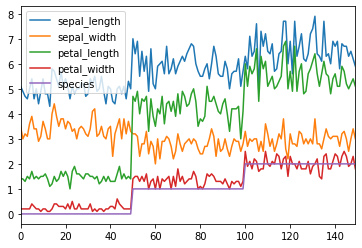

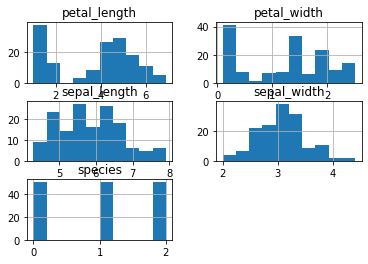

In [0]:
viz = cdf[['sepal_length','sepal_width','petal_length','petal_width','species']]
viz.plot()
viz.hist()
plt.show()

In [0]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

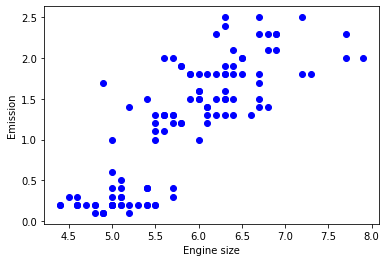

In [0]:
plt.scatter(train.sepal_length, train.petal_width,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Proses regresi linier menggunakan library sklearn

In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
train_y = np.asanyarray(train[['species']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.08815274 -0.06232648  0.17991055  0.70152801]]
Intercept:  [0.18721851]


In [0]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
test_y = np.asanyarray(test[['species']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.13
R2-score: 0.95
